In [92]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Wczytanie danych

In [93]:
data = pd.read_csv('Fifa2022-Males-1.csv')

C:\Users\jkobo\AppData\Local\Temp\ipykernel_26200\88336045.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Fifa2022-Males-1.csv')


## Podstawowe informacje

In [94]:
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,18913.000000,18913.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,55.466187,55.466187
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563,14.676659,14.676659
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,14.000000,14.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000,50.000000,50.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000,59.000000,59.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000,65.000000,65.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000,92.000000,92.000000


In [95]:
data.shape

(19239, 104)

In [96]:
data.head(5)

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


In [97]:
list(data.columns)

['sofifa_id',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'moveme

In [98]:
goalkeeping_attributes = ['goalkeeping_reflexes', 'goalkeeping_speed', 'goalkeeping_positioning', 'goalkeeping_kicking', 'goalkeeping_handling', 'goalkeeping_diving']
defending_attributes = ['defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']
irrelevant_attributes = ['sofifa_id', 'club_team_id', 'club_jersey_number', 'nation_jersey_number', 'dob', 'club_position', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position', 'real_face', 'club_loaned_from', 'club_joined']
string_attributes = ['short_name', 'long_name', 'player_tags',	'player_traits', 'club_name', 'league_name', 'nationality_name']
correlated_with_wage_eur = ['value_eur', 'international_reputation', 'overall', 'release_clause_eur', 'potential', 'movement_reactions']

## Przetworzenie kolumn z pozycjami

In [99]:
import re

pos_names = ['ls',  'st', 'rs', 'lw', 'lf' , 'cf'   , 'rf'   , 'rw' , 'lam'  , 'cam'  , 'ram'  , 'lm'   , 'lcm'  , 'cm'   , 'rcm'  , 'rm'   , 'lwb'  , 'ldm'  , 'cdm'  , 'rdm'  , 'rwb'  , 'lb'   , 'lcb'  , 'cb'   , 'rcb'  , 'rb'   , 'gk']
def calculate_position(value):
    if isinstance(value, float):
        return value
    split = re.split('-|\+', value)
    numbers = [int(num) for num in split]
    if len(numbers) == 1:
        return numbers[0]
    elif len(numbers) == 2 and '+' in value:
        return numbers[0] + numbers[1]
    else:
        return numbers[0] - numbers[1]


for col in pos_names:
    data[col] = data[col].apply(calculate_position)

# Print the updated DataFrame
print(data.iloc[:, -len(pos_names):])

<>:7: SyntaxWarning: invalid escape sequence '\+'
<>:7: SyntaxWarning: invalid escape sequence '\+'
C:\Users\jkobo\AppData\Local\Temp\ipykernel_26200\3552469082.py:7: SyntaxWarning: invalid escape sequence '\+'
  split = re.split('-|\+', value)


       ls  st  rs    lw  lf  cf  rf    rw  lam  cam  ...  ldm  cdm  rdm  rwb  \
0      92  92  92  92.0  93  93  93  92.0   93   93  ...   67   67   67   69   
1      92  92  92  85.0  88  88  88  85.0   89   89  ...   69   69   69   67   
2      91  91  91  88.0  89  89  89  88.0   89   89  ...   62   62   62   66   
3      86  86  86  90.0  88  88  88  90.0   91   91  ...   66   66   66   70   
4      86  86  86  88.0  87  87  87  88.0   91   91  ...   83   83   83   82   
...    ..  ..  ..   ...  ..  ..  ..   ...  ...  ...  ...  ...  ...  ...  ...   
19234  46  46  46  46.0  45  45  45  46.0   48   48  ...   48   48   48   50   
19235  47  47  47  47.0  46  46  46  47.0   49   49  ...   48   48   48   51   
19236  47  47  47  46.0  46  46  46  46.0   49   49  ...   48   48   48   49   
19237  49  49  49  47.0  47  47  47  47.0   47   47  ...   31   31   31   35   
19238  47  47  47  47.0  47  47  47  47.0   49   49  ...   46   46   46   47   

       lb  lcb  cb  rcb  rb  gk  
0    

## One-hot encoding zmiennych kategorycznych
pozycja:

In [100]:
pos_label = 'player_positions'
df_one_hot = data[pos_label].str.get_dummies(', ')

data = pd.concat([data, df_one_hot], axis=1)
data = data.drop(columns=[pos_label])


dominująca noga:

In [101]:
label = 'preferred_foot'
df_one_hot = data[label].str.get_dummies()

data = pd.concat([data, df_one_hot], axis=1)
data = data.drop(columns=[label])


work_rate:

In [102]:
label = 'work_rate'
df_one_hot = data[label].str.get_dummies()

data = pd.concat([data, df_one_hot], axis=1)
data = data.drop(columns=[label])


In [103]:
label = 'body_type'
df_one_hot = data[label].str.get_dummies()

data = pd.concat([data, df_one_hot], axis=1)
data = data.drop(columns=[label])

In [104]:
data = data[data['GK'] == 0]
data

,sofifa_id,short_name,long_name,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,Lean (170-),Lean (170-185),Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,93,93,78000000.0,320000.0,34,1987-06-24,170,...,0,0,0,0,0,0,0,0,0,1
1,188545,R. Lewandowski,Robert Lewandowski,92,92,119500000.0,270000.0,32,1988-08-21,185,...,0,0,0,0,0,0,0,0,0,1
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,91,91,45000000.0,270000.0,36,1985-02-05,187,...,0,0,0,0,0,0,0,0,0,1
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,91,91,129000000.0,270000.0,29,1992-02-05,175,...,0,0,0,0,0,0,0,0,0,1
4,192985,K. De Bruyne,Kevin De Bruyne,91,91,125500000.0,350000.0,30,1991-06-28,181,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,Song Defu,宋德福,47,52,70000.0,1000.0,22,1999-01-02,180,...,0,1,0,0,0,0,0,0,0,0
19235,262040,C. Porter,Caoimhin Porter,47,59,110000.0,500.0,19,2002-03-18,175,...,0,1,0,0,0,0,0,0,0,0
19236,262760,N. Logue,Nathan Logue-Cunningham,47,55,100000.0,500.0,21,2000-02-07,178,...,0,1,0,0,0,0,0,0,0,0
19237,262820,L. Rudden,Luke Rudden,47,60,110000.0,500.0,19,2002-04-23,173,...,0,1,0,0,0,0,0,0,0,0


In [105]:
data = data.drop(goalkeeping_attributes, axis = 1)
data = data.drop(defending_attributes[1:], axis = 1)
data = data.drop(irrelevant_attributes, axis = 1)
data = data.drop(string_attributes, axis = 1)
data = data.drop(correlated_with_wage_eur, axis = 1)
column_with_nan = 'wage_eur'

data = data.dropna(subset=[column_with_nan])

data

,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,pace,shooting,passing,...,Lean (170-),Lean (170-185),Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique
0,320000.0,34,170,72,1.0,4,4,85.0,92.0,91.0,...,0,0,0,0,0,0,0,0,0,1
1,270000.0,32,185,81,1.0,4,4,78.0,92.0,79.0,...,0,0,0,0,0,0,0,0,0,1
2,270000.0,36,187,83,1.0,4,5,87.0,94.0,80.0,...,0,0,0,0,0,0,0,0,0,1
3,270000.0,29,175,68,1.0,5,5,91.0,83.0,86.0,...,0,0,0,0,0,0,0,0,0,1
4,350000.0,30,181,70,1.0,5,4,76.0,86.0,93.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,1000.0,22,180,64,1.0,3,2,58.0,35.0,46.0,...,0,1,0,0,0,0,0,0,0,0
19235,500.0,19,175,70,1.0,3,2,59.0,39.0,50.0,...,0,1,0,0,0,0,0,0,0,0
19236,500.0,21,178,72,1.0,3,2,60.0,37.0,45.0,...,0,1,0,0,0,0,0,0,0,0
19237,500.0,19,173,66,1.0,3,2,68.0,46.0,36.0,...,0,1,0,0,0,0,0,0,0,0


## Brakujące dane

In [106]:
empty_data = data.isna().sum().sort_values(ascending=False).reset_index(drop = False).rename(columns={"index": "Column", 0: 'Count'})
empty_data['Percentage'] = (empty_data['Count'] / len(data)) * 100
empty_data.head(10)

,Column,Count,Percentage
0,rw,326,1.911575
1,lw,326,1.911575
2,wage_eur,0,0.000000
3,rb,0,0.000000
4,LW,0,0.000000
5,LM,0,0.000000
6,LB,0,0.000000
7,GK,0,0.000000
8,CM,0,0.000000
9,CF,0,0.000000


## Zarobki w zależności od ligii

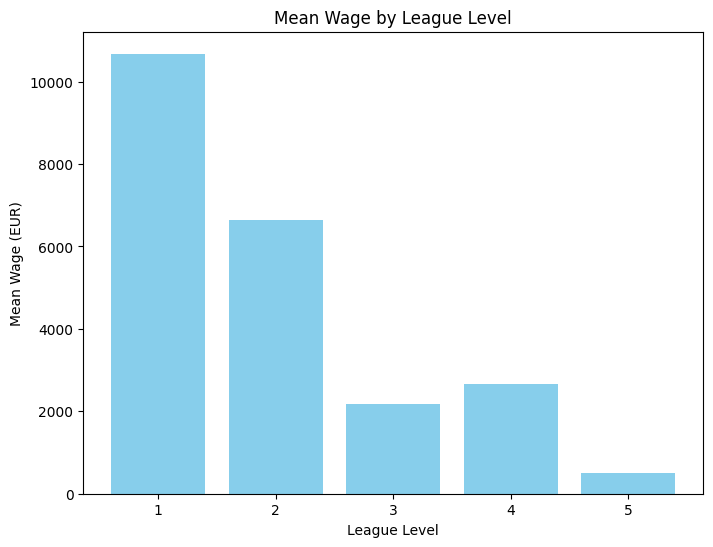

In [107]:
mean_wage_by_league = data.groupby('league_level')['wage_eur'].mean()

# Extract league levels and mean wages
league_levels = mean_wage_by_league.index
mean_wages = mean_wage_by_league.values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(league_levels, mean_wages, color='skyblue')
plt.xlabel('League Level')
plt.ylabel('Mean Wage (EUR)')
plt.title('Mean Wage by League Level')
plt.show()

## Dystrybucja zarobków i wartości zawodników

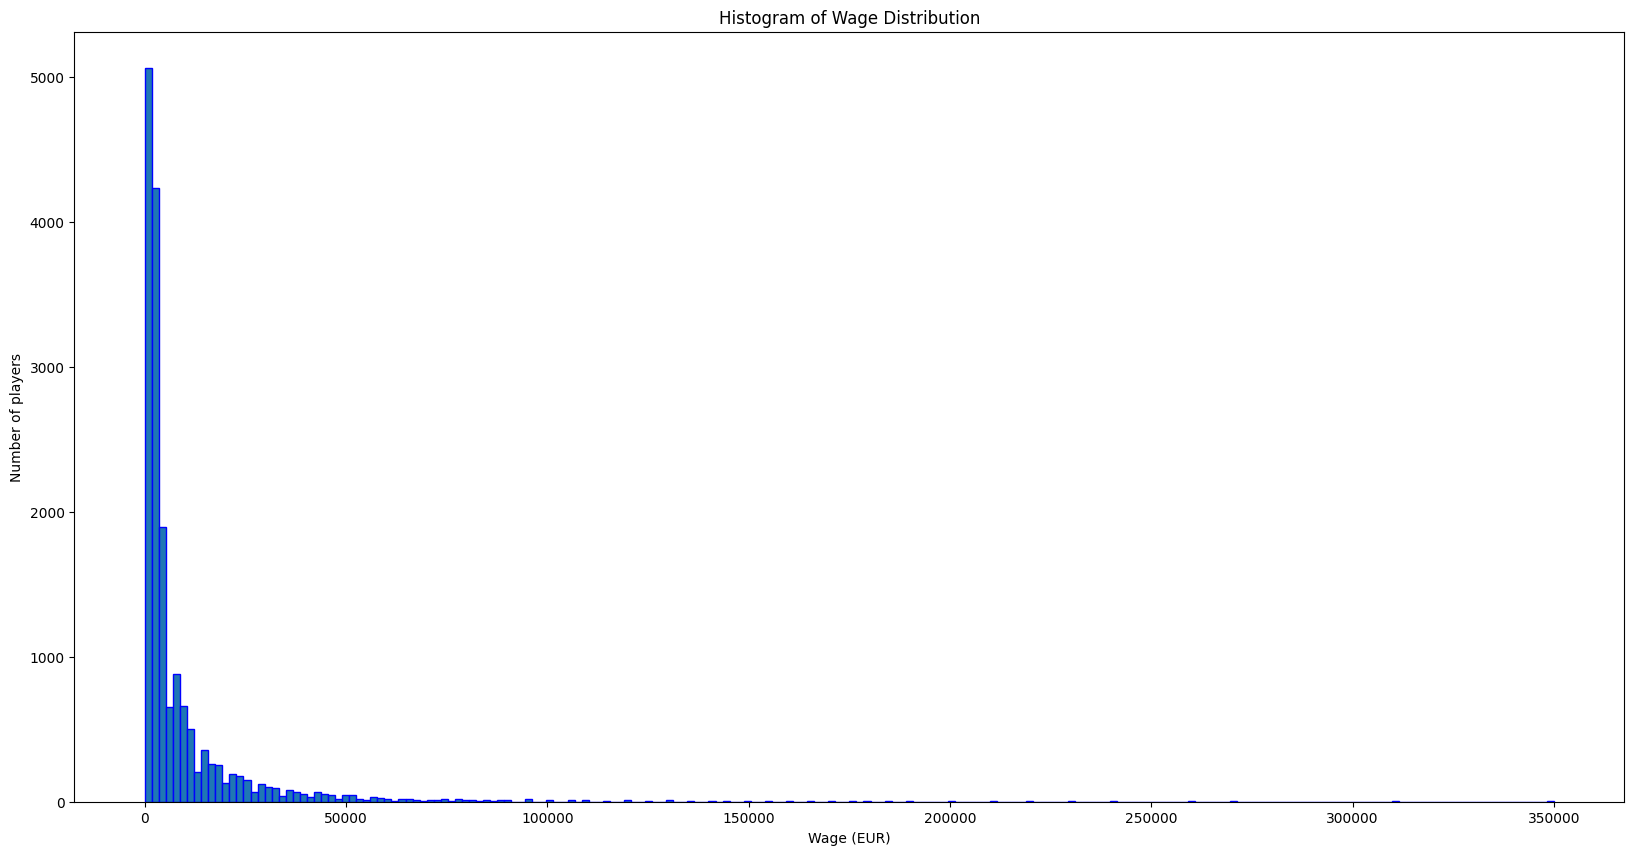

In [108]:
num_bins = 200

hist_range = (0, data['wage_eur'].max())

plt.figure(figsize=(20,10))
plt.hist(data['wage_eur'], bins=num_bins, range=hist_range, edgecolor='blue')

plt.xlabel('Wage (EUR)')
plt.ylabel('Number of players')
plt.title('Histogram of Wage Distribution')

plt.show()

## Dystrybucje wieku, wzrostu, wagi i poziomu ligii

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'league_level'}>]], dtype=object)

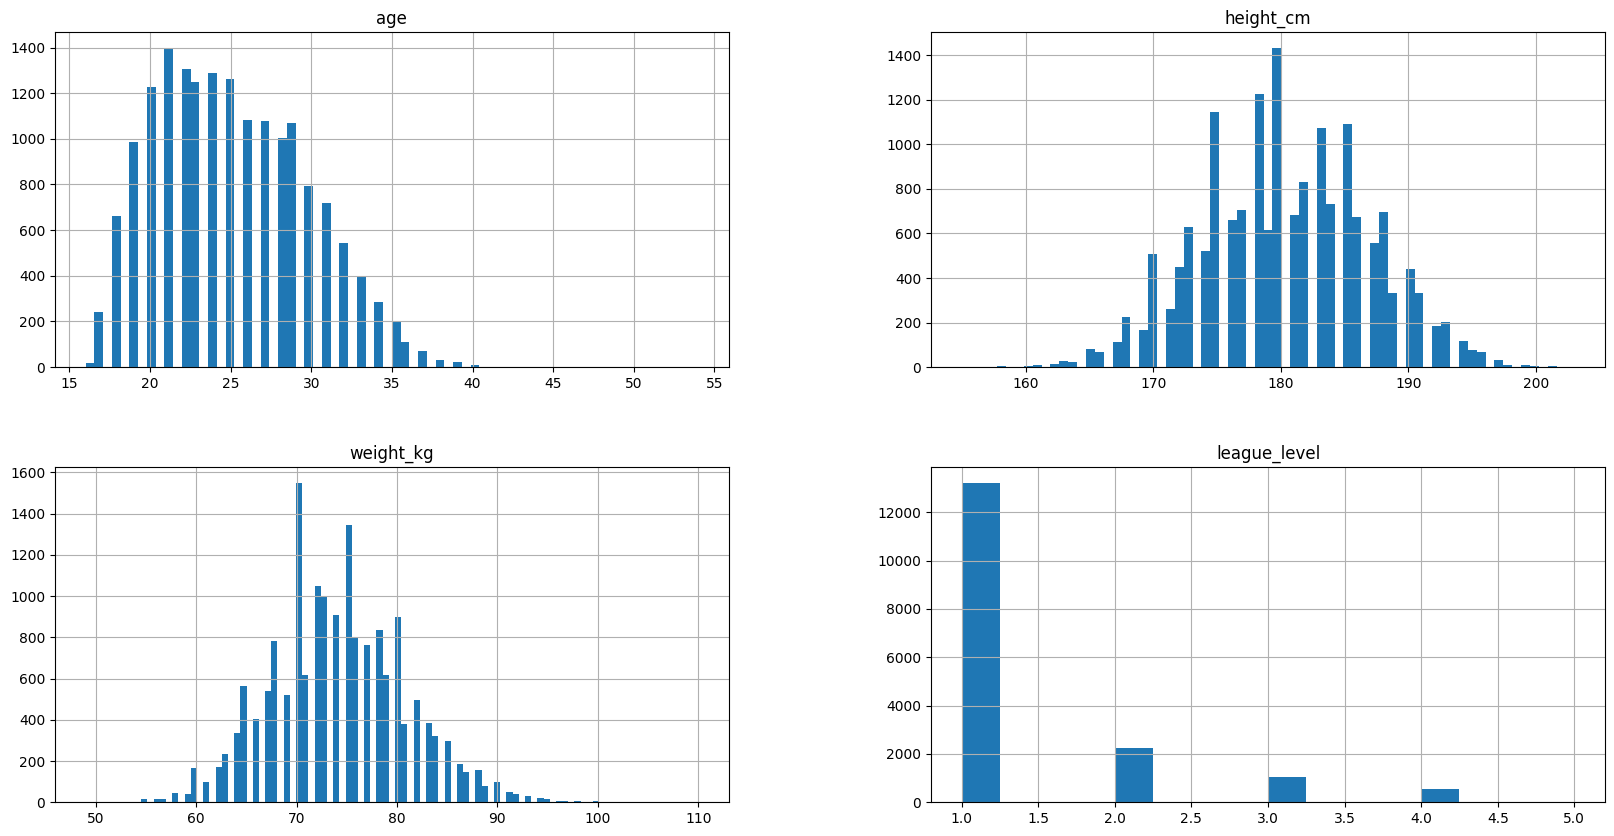

In [109]:
dataShort = data[['age', 'height_cm', 'weight_kg', 'league_level']]
dataShort.hist(bins='auto', figsize=(20, 10))

## Korelacja atrybutów

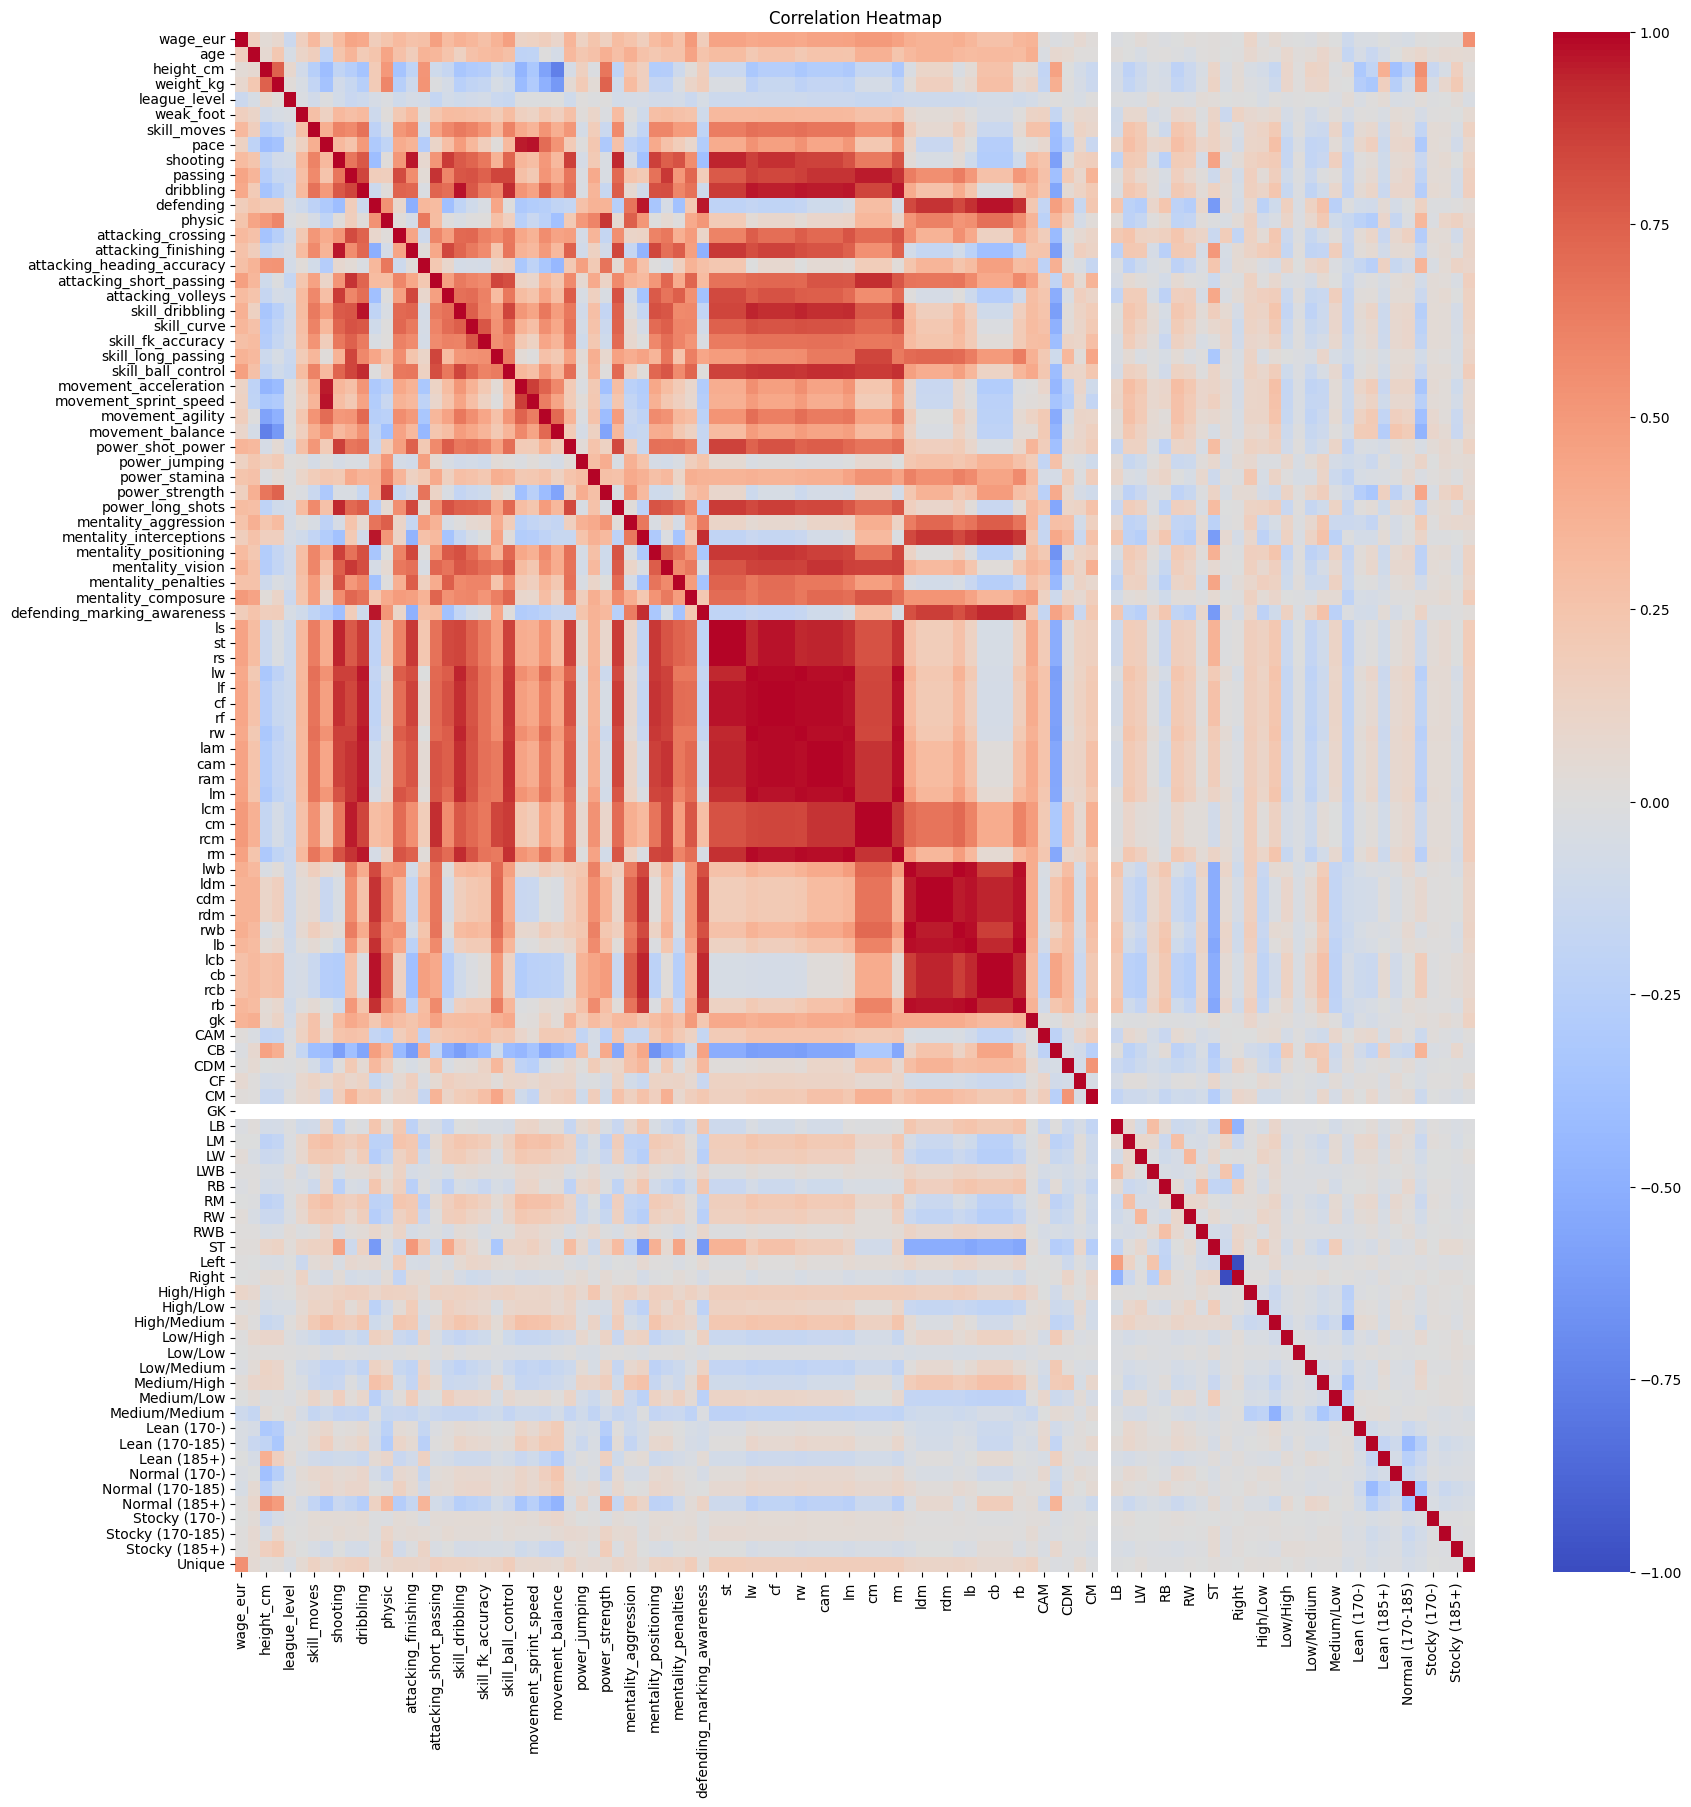

In [110]:
dataNumeric = data.select_dtypes(include=['number'])

correlation_matrix = dataNumeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

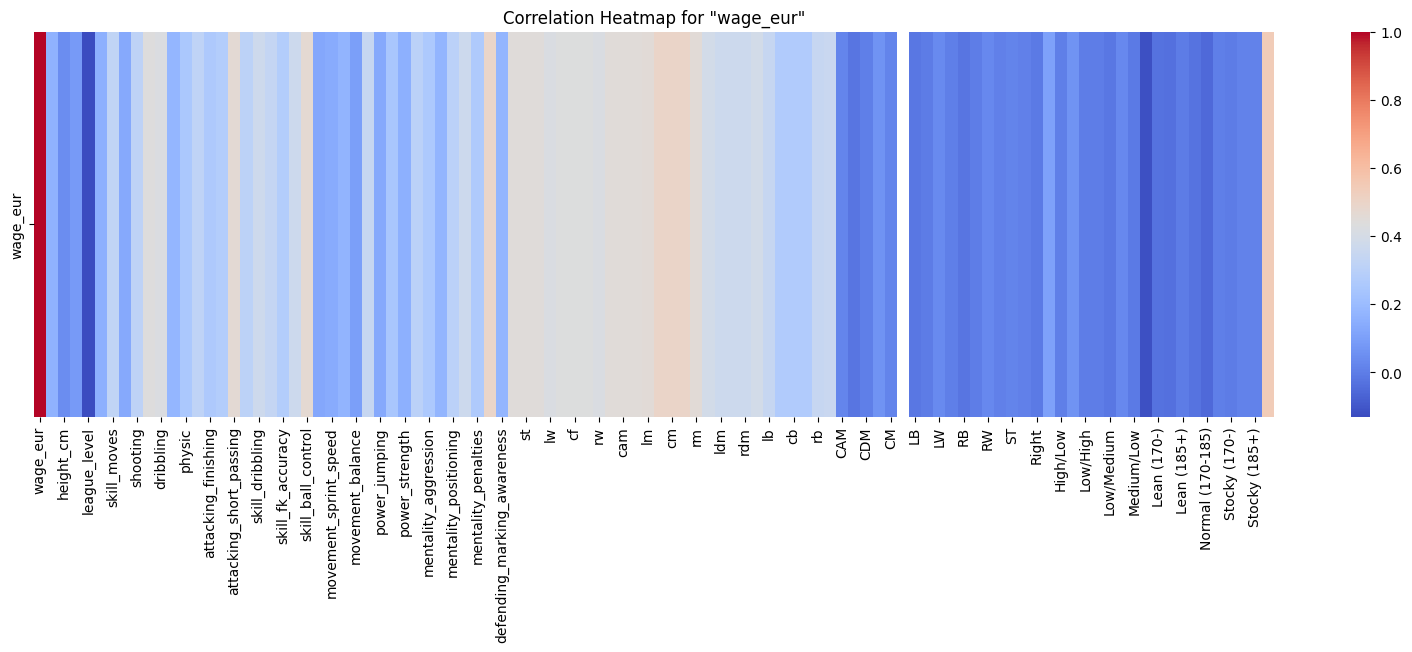

In [111]:
attributes_of_interest = ['wage_eur']
selected_attributes = attributes_of_interest + [col for col in dataNumeric.columns if col not in attributes_of_interest]

subset_correlation_matrix = correlation_matrix.loc[attributes_of_interest, selected_attributes]

plt.figure(figsize=(20, 5))
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for "wage_eur"')
plt.show()

## Lista najbardziej skorelowanych atrybutów

In [112]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top_correlations = corr_pairs.abs().sort_values(ascending=False).head(50)
top_correlations

Left   Right    1.000000
lf     rf       1.000000
rs     ls       1.000000
rcb    cb       1.000000
rs     st       1.000000
ldm    cdm      1.000000
       rdm      1.000000
cdm    ldm      1.000000
cf     rf       1.000000
       lf       1.000000
cdm    rdm      1.000000
lam    ram      1.000000
rdm    ldm      1.000000
lam    cam      1.000000
rcb    lcb      1.000000
rdm    cdm      1.000000
cb     rcb      1.000000
       lcb      1.000000
rwb    lwb      1.000000
lcb    rcb      1.000000
lw     rw       1.000000
lb     rb       1.000000
lcb    cb       1.000000
lwb    rwb      1.000000
rm     lm       1.000000
st     ls       1.000000
Right  Left     1.000000
ls     st       1.000000
       rs       1.000000
ram    lam      1.000000
       cam      1.000000
rf     cf       1.000000
       lf       1.000000
lm     rm       1.000000
cam    ram      1.000000
st     rs       1.000000
lf     cf       1.000000
lcm    cm       1.000000
       rcm      1.000000
rw     lw       1.000000


In [113]:
# Calculate the correlation matrix
correlation_matrix = dataNumeric.corr()

# Find columns with high correlation
high_corr_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_corr_columns.add(colname)

high_corr_columns

{'Right',
 'attacking_finishing',
 'cam',
 'cb',
 'cdm',
 'cf',
 'cm',
 'defending_marking_awareness',
 'lam',
 'lb',
 'lcb',
 'lcm',
 'ldm',
 'lf',
 'lm',
 'ls',
 'lw',
 'mentality_interceptions',
 'movement_acceleration',
 'movement_sprint_speed',
 'power_long_shots',
 'ram',
 'rb',
 'rcb',
 'rcm',
 'rdm',
 'rf',
 'rm',
 'rs',
 'rw',
 'rwb',
 'skill_ball_control',
 'skill_dribbling',
 'st'}

## PCA

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [115]:
# standarize data and remove NaNs
numericColumns = dataNumeric.select_dtypes(include='number').columns.tolist()
dataNoNans = dataNumeric[numericColumns].fillna(0, inplace=False)
dataNoNans[numericColumns] = StandardScaler().fit_transform(dataNoNans[numericColumns])
dataNoNans

,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,pace,shooting,passing,...,Lean (170-),Lean (170-185),Lean (185+),Normal (170-),Normal (170-185),Normal (185+),Stocky (170-),Stocky (170-185),Stocky (185+),Unique
0,15.631363,1.928162,-1.587187,-0.312176,-0.475266,1.537047,2.320583,1.535731,2.822688,3.346368,...,-0.169631,-0.553281,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,11.684702
1,13.115449,1.495908,0.704721,1.032042,-0.475266,1.537047,2.320583,0.895196,2.822688,2.154746,...,-0.169631,-0.553281,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,11.684702
2,13.115449,2.360416,1.010308,1.330757,-0.475266,1.537047,3.889285,1.718740,2.965013,2.254048,...,-0.169631,-0.553281,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,11.684702
3,13.115449,0.847526,-0.823218,-0.909606,-0.475266,3.076079,3.889285,2.084760,2.182227,2.849859,...,-0.169631,-0.553281,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,11.684702
4,17.140912,1.063653,0.093545,-0.610891,-0.475266,3.076079,2.320583,0.712186,2.395714,3.544972,...,-0.169631,-0.553281,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,11.684702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,-0.420172,-0.665363,-0.059249,-1.507036,-0.475266,-0.001985,-0.816822,-0.934902,-1.233566,-1.122214,...,-0.169631,1.807401,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,-0.085582
19235,-0.445331,-1.313744,-0.823218,-0.610891,-0.475266,-0.001985,-0.816822,-0.843397,-0.948916,-0.725007,...,-0.169631,1.807401,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,-0.085582
19236,-0.445331,-0.881490,-0.364836,-0.312176,-0.475266,-0.001985,-0.816822,-0.751892,-1.091241,-1.221516,...,-0.169631,1.807401,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,-0.085582
19237,-0.445331,-1.313744,-1.128805,-1.208321,-0.475266,-0.001985,-0.816822,-0.019853,-0.450780,-2.115233,...,-0.169631,1.807401,-0.315064,-0.202064,-0.772345,-0.460056,-0.075633,-0.177869,-0.128258,-0.085582


In [116]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0, n_components=len(numericColumns))
dataTransformed = pca.fit_transform(dataNoNans)
df_transformed = pd.DataFrame(
        data = dataTransformed,
        columns = numericColumns
    ) 
n_components = len(pca.components_)
pca_cols = [f'PC{x+1}' for x in range(n_components)]
df_pca_components = pd.DataFrame(data = np.transpose(pca.components_), columns=pca_cols, index=dataNumeric.columns)
df_pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102
wage_eur,0.087220,0.051890,0.053269,-0.079573,-0.013650,0.257876,0.163524,-0.008764,0.293978,0.011405,...,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
age,0.057941,0.076515,0.126442,0.000822,0.044689,-0.279068,0.241016,0.123184,-0.068415,0.093201,...,4.063411e-17,-1.167343e-17,4.492009e-17,3.507544e-17,-2.888192e-17,-3.137321e-17,1.051417e-17,7.378393e-17,7.375784e-17,-1.694564e-16
height_cm,-0.050323,0.079750,0.271843,-0.076888,0.066813,0.249284,-0.148450,0.047348,-0.138549,-0.077356,...,-3.198964e-17,1.032779e-16,-5.061484e-17,6.695666e-17,3.299743e-17,-2.067495e-16,5.910102e-17,-9.847961e-17,1.800788e-16,7.885009e-17
weight_kg,-0.028617,0.081601,0.279154,-0.097180,0.046804,0.065225,-0.079919,0.110234,-0.075468,-0.075829,...,-1.157797e-16,-3.909927e-17,-8.412323e-17,-7.508452e-17,8.877844e-17,1.018203e-16,-8.098525e-17,9.451570e-17,-6.599969e-17,-5.848059e-18
league_level,-0.024824,-0.014103,0.000475,-0.018224,-0.011582,-0.056594,-0.158851,-0.064708,-0.176674,0.079832,...,2.390005e-17,6.667597e-17,-4.807808e-18,3.392849e-17,-6.625880e-17,-3.639145e-17,-7.314224e-18,-5.730315e-17,1.289178e-17,-4.247667e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal (185+),-0.038064,0.055941,0.189036,-0.048987,0.060075,0.154334,0.054333,-0.000330,-0.112724,0.062633,...,-2.745399e-05,2.609661e-04,2.066187e-03,-1.517013e-03,-3.888401e-04,-5.082447e-05,2.086379e-04,2.068814e-04,8.423327e-02,3.382555e-01
Stocky (170-),0.009122,-0.005603,-0.022435,-0.002253,-0.009080,-0.061637,0.070517,-0.036460,-0.006366,0.061247,...,-5.437590e-06,5.168744e-05,4.092330e-04,-3.004624e-04,-7.701440e-05,-1.006639e-05,4.132322e-05,4.097532e-05,1.668340e-02,6.699552e-02
Stocky (170-185),0.009720,0.001261,0.029655,-0.042673,-0.028845,-0.104887,0.030291,-0.079516,-0.055380,0.126880,...,-1.246656e-05,1.185018e-04,9.382329e-04,-6.888588e-04,-1.765680e-04,-2.307883e-05,9.474018e-05,9.394255e-05,3.824940e-02,1.535981e-01
Stocky (185+),-0.009273,0.010622,0.082091,-0.026687,0.007119,-0.021451,0.002373,-0.016549,-0.047271,0.003707,...,-9.123694e-06,8.672599e-05,6.866491e-04,-5.041438e-04,-1.292219e-04,-1.689033e-05,6.933594e-05,6.875220e-05,2.799296e-02,1.124113e-01


In [117]:
import random

def ggbiplot_pca(score, coeff,labels=None):
    plt.figure(figsize=(20, 12))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1/(xs.max() - xs.min())
    scaley = 1/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, marker='.', alpha=0.25)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'g',alpha = 1)
        if labels is None:
            plt.text(
                coeff[i,0] * 1.15, 
                coeff[i,1] * 1.15, 
                "Var"+str(i+1), 
                color = 'r', ha = 'center', va = 'center')
        else:
            plt.text(
                coeff[i,0] * 1.15 + random.uniform(-0.01, 0.01), 
                coeff[i,1] * 1.15 + random.uniform(-0.01, 0.01),
                labels[i], 
                color = 'r', ha = 'center', va = 'center', fontsize = 8)
    #plt.xlim(-0.25,1)
    #plt.ylim(-0.5,1)
    plt.xlabel(f"PC{0}")
    plt.ylabel(f"PC{1}")
    plt.grid()

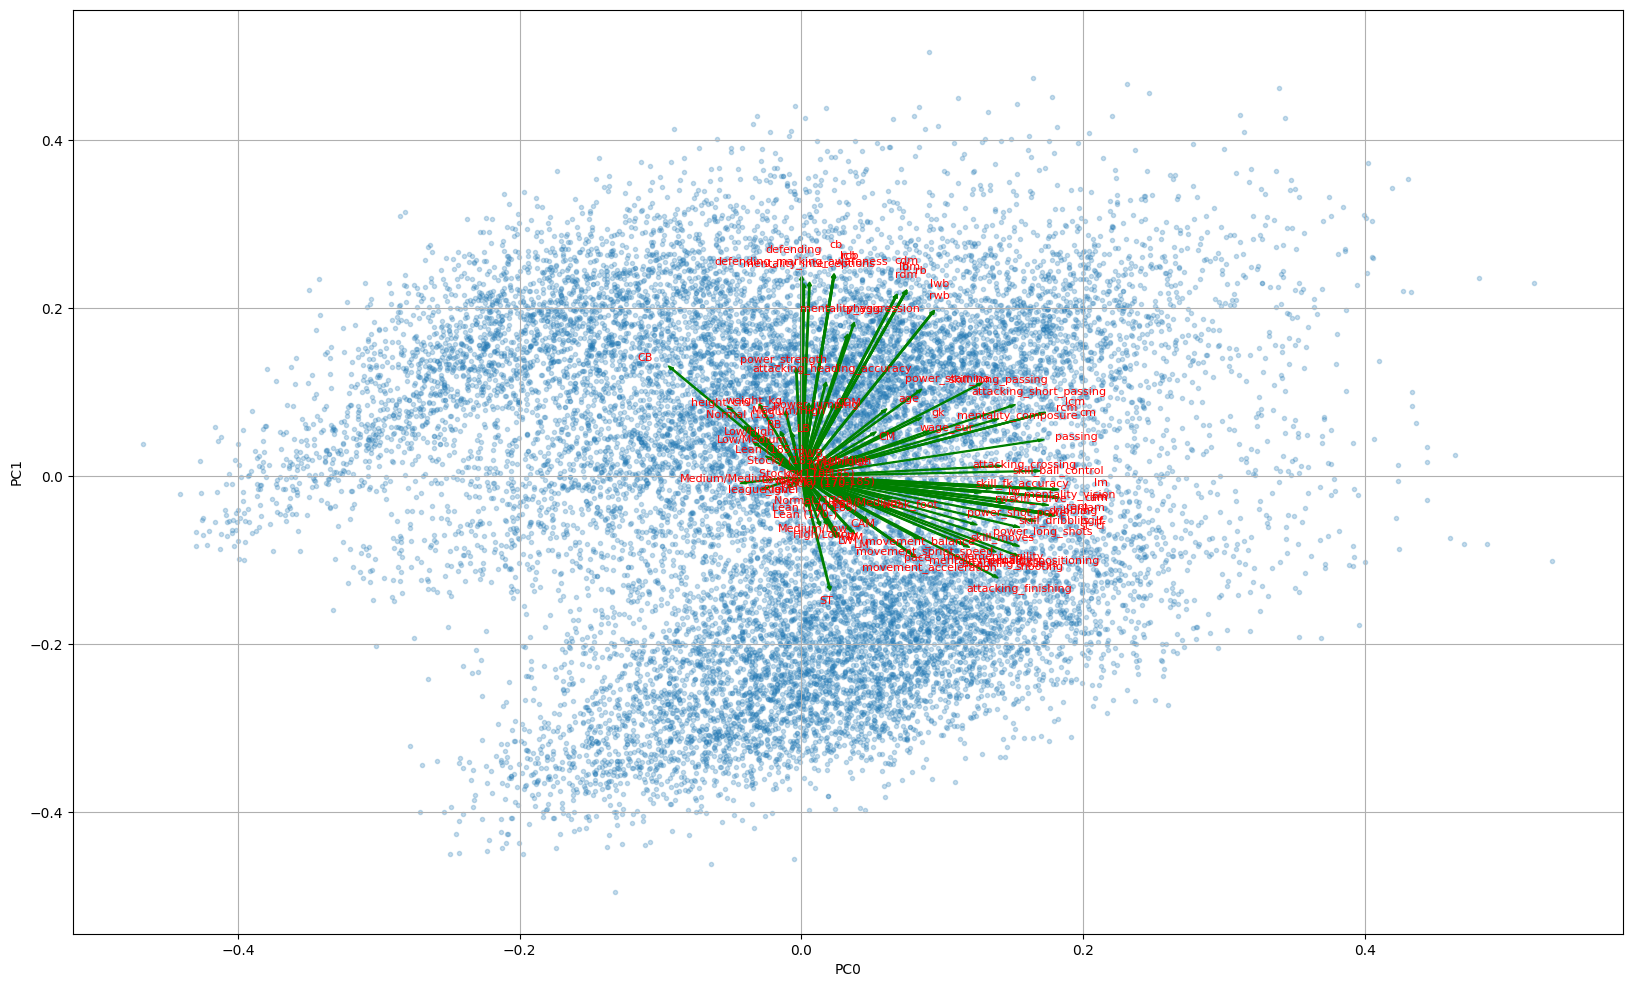

In [118]:
ggbiplot_pca(
    score = df_transformed.values[:,0:2],
    coeff = np.transpose(df_pca_components.values)[0:2, :].T,
    labels = numericColumns
)
plt.show()

In [119]:
criterium = 0.9
sum = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(pca.explained_variance_ratio_)):
    val = sum[i]
    if val >= criterium:
        print(f'Number of components that satisfy percentage criterion of the explained variance: {i+1}')
        break

Number of components that satisfy percentage criterion of the explained variance: 34


In [120]:
pca_dict = {
        'Proportion of Variance': pca.explained_variance_ratio_,
        'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
    }
    
# summary
df_pca_summarize = pd.DataFrame.from_dict(
        data = pca_dict,
        columns = pca_cols[:len(numericColumns)],
        orient='index'
    )

<Axes: >

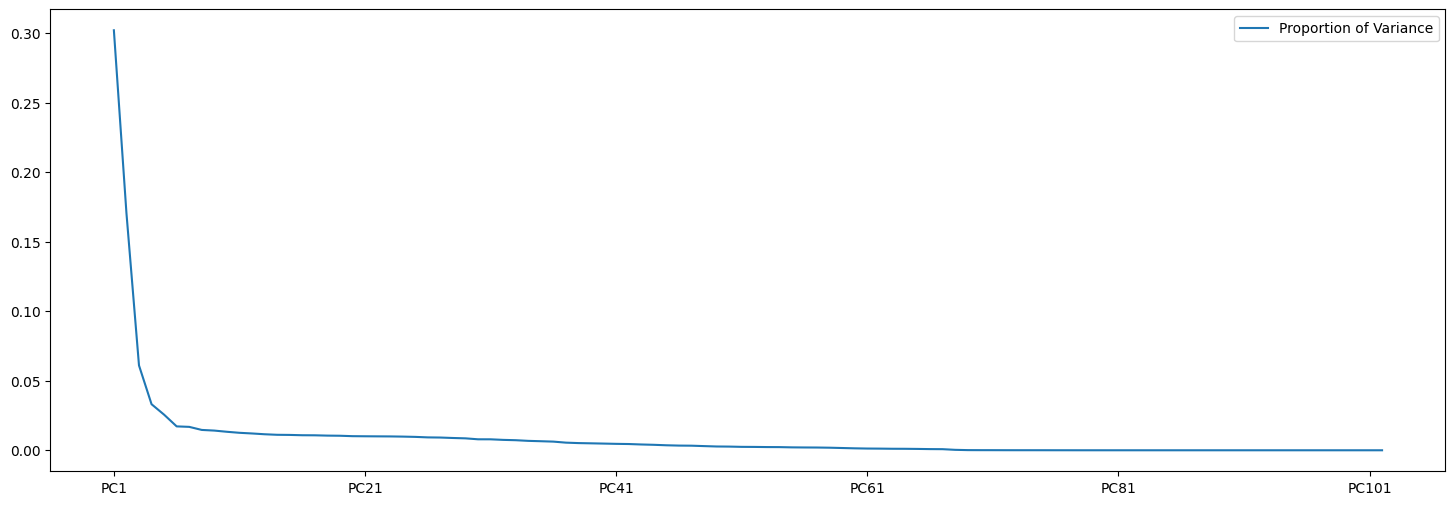

In [121]:
df_pca_summarize.T.plot.line(y=0, figsize=(18,6))

In [122]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataNumeric, random_state=1, test_size=0.30)

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [124]:
def test_model(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    err = abs(y_pred - y_test)
    MAE = round(np.mean(err),2)
    RMSE = round(np.sqrt(((model.predict(x_test) - y_test)**2).mean()),2)
    print("MAE:", MAE, "RMSE:", RMSE)
    
    return err, y_pred

In [125]:
x_train = df_train.drop(['wage_eur'], axis=1)
y_train = df_train['wage_eur']

x_test = df_test.drop(['wage_eur'], axis=1)
y_test = df_test['wage_eur']

clf = DecisionTreeRegressor(max_depth = 20, random_state = 1)
clf = clf.fit(x_train, y_train)
    
err, y_pred = test_model(clf, x_test, y_test)

m = y_train.median()
m

MAE: 8179.43 RMSE: 14911.27


3000.0

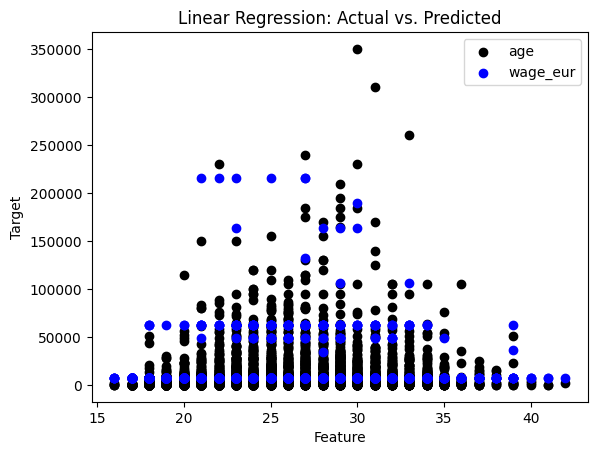

In [126]:
plt.scatter(x_test.iloc[:,0], y_test, color='black', label=x_test.columns[0])
plt.scatter(x_test.iloc[:,0], y_pred, color='blue', label='wage_eur')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## LASSO

In [127]:
from sklearn.linear_model import Lasso

['age', 'height_cm', 'weight_kg', 'league_level', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy']


<Axes: xlabel='lambda'>

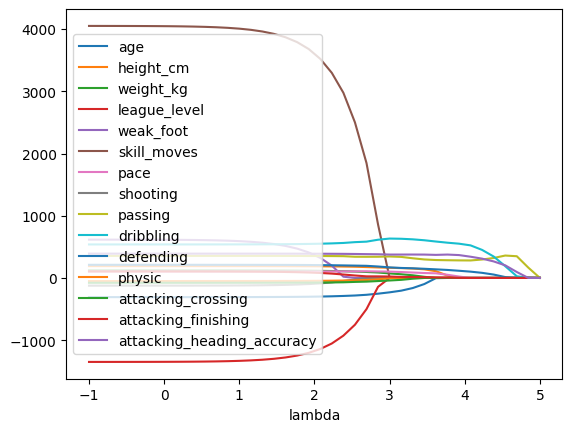

In [128]:
#    UZUPEŁNIĆ
x = 'wage_eur'
dfx = data[x]
features = numericColumns
if x in features:
    features.remove(x)
features = features[0:15]
print(features)
data.head(10)

dataNum = dataNumeric[numericColumns].fillna(data.median(), inplace=False)

l_min = -1
l_max = 5
l_num = 40
lambdas = np.linspace(l_min,l_max, l_num)

coefs = []
for i in lambdas:    
    clf = Lasso(alpha=10**i,  tol=1e-2)
    clf.fit(dataNum[features], dfx)
    coefs.append([i, *clf.coef_])

df_coefs = pd.DataFrame.from_records(coefs)
df_coefs.columns = ['lambda', *features]
df_coefs = df_coefs.set_index('lambda')
df_coefs.plot()



## Las losowy

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report

In [130]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['wage_eur'], test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy:.2f}')

# Display additional metrics
test_model(rf_regressor, x_test, y_test)

MAE: 4783.9 RMSE: 11405.11


(12089     2119.0
 2585      3789.5
 10331     2592.0
 3922     16953.5
 820      10517.0
           ...   
 10924       11.5
 19194      153.0
 12852     2004.0
 12385      579.5
 17271      850.5
 Name: wage_eur, Length: 3411, dtype: float64,
 array([ 2619. , 21789.5,  3092. , ...,  2504. ,  1579.5,  1400.5]))

## Klasyfikacja

In [131]:

data['rank'] = data['wage_eur'].rank(ascending=False, method='max')

data['isTop10'] = data['rank'].apply(lambda x: 1 if x <= 1000 else 0)

data = data.drop(columns=['rank'])


## Las losowy

In [132]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['isTop10'], test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_regressor = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3226
           1       0.70      0.52      0.60       185

    accuracy                           0.96      3411
   macro avg       0.84      0.76      0.79      3411
weighted avg       0.96      0.96      0.96      3411

